IMPORT IMPORTANT LIBRARIES

In [30]:
import pandas as pd
import numpy as np
import csv
import json
from numbers import Number
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline

In [31]:
Kc_housing = pd.read_csv("C:\\Users\\User\\OneDrive\\Desktop\\Flatiron\\dsc-data-science-env-config\\Phase_two\\Phase-2-Group-17-Project\\data\\kc_house_data.csv")

Kc_housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [32]:
Kc_housing.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


COLUMN NAMES AND DESCRIPTION FOR KING COUNTY DATA SET
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [33]:
#Handling missing values.
#Identify whether the data set has missing values.
Kc_housing.isnull().sum()



id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [34]:
#Handling missing values.
#Identify whether the data set has missing values.
Kc_housing.isnull().sum()



id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [35]:
Kc_housing.isnull().mean()

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.000000
yr_renovated     0.177895
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
dtype: float64

#DROPPING IRRELEVANT COLUMNS

#The highest percentge is yr_renovated at 177.9% and waterfront at 110%. Because the percentages are high, we can
drop them since they will be irrelevant in my data analysis. I will not drop view which is at 2%

In [36]:
#DROPPING IRRELEVANT COLUMNS
#Lets drop the waterfront and yr_renovated columns as they seem to be irrelevant.
Kc_housing.drop(columns=['waterfront','yr_renovated'], inplace=True)
Kc_housing.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [37]:
#lets check for duplicates.
Kc_housing.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

There are no duplicated values

In [38]:
#Let's fill all the missing values with its mean
Kc_housing = Kc_housing.fillna(Kc_housing.mean())
Kc_housing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


In [39]:
#lets confirm if we have filled all the missing values
Kc_housing.isnull().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values

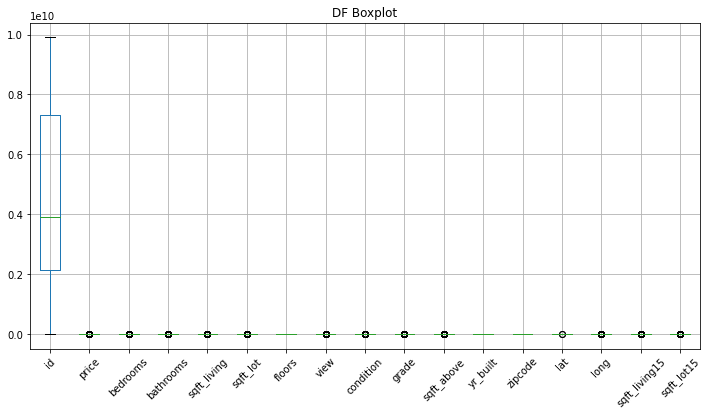

In [40]:
#Handling Outliers
#lets first find out if we have outliers by constructing a boxplot.
# Create a larger figure
plt.figure(figsize=(12, 6))
# Create a boxplot of the DataFrame with rotated x-axis labels
Kc_housing.boxplot()
plt.xticks(rotation=45)
# Add a title to the plot
plt.title('DF Boxplot')
# Display the plot
plt.show()


From the above analysis, we can see that outlier is the Id column. There are two ways of getting rid of
outliers.
z score - Normal distribution. 
IQR - skewed distribution.


In [41]:
Kc_housing.id.skew()


0.24322552200343647

From the above analysis on skewness, we see that the id has a skewed distribution. However we will not drop any outlier as all values have a probability of happening in the real world.

FEATURE ENGINEERING

In [42]:
#lets capitalize the Column titles.
Kc_housing.columns = Kc_housing.columns.str.capitalize()
Kc_housing.head()

,Id,Date,Price,Bedrooms,Bathrooms,Sqft_living,Sqft_lot,Floors,View,Condition,Grade,Sqft_above,Sqft_basement,Yr_built,Zipcode,Lat,Long,Sqft_living15,Sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


In [43]:
Kc_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             21597 non-null  int64  
 1   Date           21597 non-null  object 
 2   Price          21597 non-null  float64
 3   Bedrooms       21597 non-null  int64  
 4   Bathrooms      21597 non-null  float64
 5   Sqft_living    21597 non-null  int64  
 6   Sqft_lot       21597 non-null  int64  
 7   Floors         21597 non-null  float64
 8   View           21597 non-null  float64
 9   Condition      21597 non-null  int64  
 10  Grade          21597 non-null  int64  
 11  Sqft_above     21597 non-null  int64  
 12  Sqft_basement  21597 non-null  object 
 13  Yr_built       21597 non-null  int64  
 14  Zipcode        21597 non-null  int64  
 15  Lat            21597 non-null  float64
 16  Long           21597 non-null  float64
 17  Sqft_living15  21597 non-null  int64  
 18  Sqft_l

DATA ANALYSIS

TypeError: xlabel() takes from 1 to 3 positional arguments but 6 were given

<Figure size 576x288 with 0 Axes>

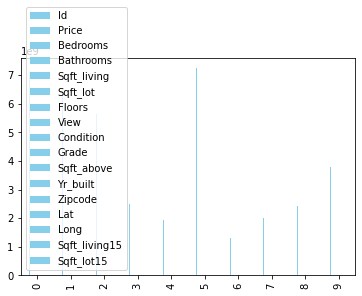

In [44]:
# Plotting the 
plt.figure(figsize=(8, 4))
Kc_housing.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Bedrooms','Bathrooms','Sqft_living','Floors','Condition','Yr_built')
plt.ylabel('Price')
plt.title('Kc_housing')
plt.xticks(rotation=45, ha='right')
plt.show()